## Personalizando el modo de visualización

**Matplotlib** da la posibilidad de modificar el estilo de la graficación en distintas "etapas".

### Archivo de configuración


Cuando uno carga el módulo busca un archivo de configuración llamado `matplotlibrc`

  1. Primero busca un archivo de configuración en el directorio de trabajo también lo lee. En cada caso sobreescribe las variables. 
  2. Si la variable `MATPLOTLIBRC` existe (para el usuario), busca el archivo `$MATPLOTLIBRC/matplotlibrc`
  3. Luego lee un archivo de configuración global del usuario, que dependiendo del sistema operativo puede ser:
    * En Linux, `.config/matplotlib/matplotlibrc` (o en `$XDG_CONFIG_HOME/matplotlib/matplotlibrc` si la variable `XDG_CONFIG_HOME` existe)
    * En otras plataformas puede estar en algún lugar como: `C:\Documents and Settings\USUARIO\.matplotlib`
  4. Finalmente lee el archivo global de la instalación, `INSTALL/matplotlib/mpl-data/matplotlibrc`, donde INSTALL se refiere al lugar de instalación

En cualquier caso, podemos obtener el directorio y archivo de configuración con las funciones:

In [6]:
import matplotlib

In [7]:
matplotlib.get_configdir()

'/home/fiol/.config/matplotlib'

In [8]:
matplotlib.matplotlib_fname()

'/usr/share/matplotlib/mpl-data/matplotlibrc'

In [12]:
!head -n 140 '/usr/share/matplotlib/mpl-data/matplotlibrc'

#### MATPLOTLIBRC FORMAT

## NOTE FOR END USERS: DO NOT EDIT THIS FILE!
##
## This is a sample Matplotlib configuration file - you can find a copy
## of it on your system in site-packages/matplotlib/mpl-data/matplotlibrc
## (relative to your Python installation location).
## DO NOT EDIT IT!
##
## If you wish to change your default style, copy this file to one of the
## following locations:
##     Unix/Linux:
##         $HOME/.config/matplotlib/matplotlibrc OR
##         $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
##     Other platforms:
##         $HOME/.matplotlib/matplotlibrc
## and edit that copy.
##
## See https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
## for more details on the paths which are checked for the configuration file.
##
## Blank lines, or lines starting with a comment symbol, are ignored, as are
## trailing comments.  Other lines must have the format:
##     key: val  # optional commen

### Hojas de estilo

Matplotlib ha incorporado en los últimos años un paquete que permite cambiar estilos fácilmente utilizando los mismos nombres para los parámetros que hay en el archivo de configuración `matplotlibrc`.

Este paquete tiene pre-definidos unos pocos estilos, entre ellos varios que emulan otros paquetes o programas. Veamos un ejemplo:


In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
fdatos = '../data/ej_oscil_aten_err.dat'
x, y, yexp = np.loadtxt(fdatos, unpack=True)

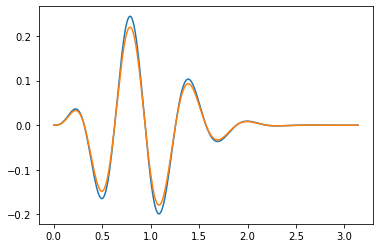

In [15]:
plt.plot(x,y, x, 0.9*y)

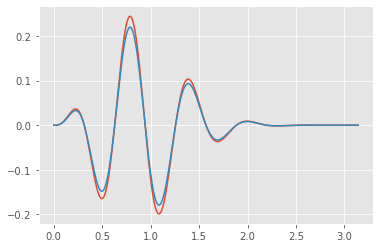

In [16]:
with plt.style.context('ggplot'):
  plt.plot(x,y, x,0.9*y)

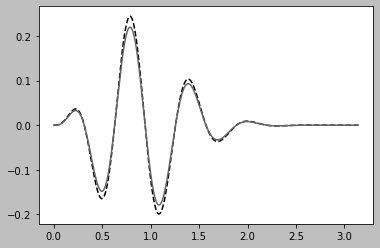

In [19]:
with plt.style.context('grayscale'):
  plt.plot(x,y,'--', x,0.9*y)

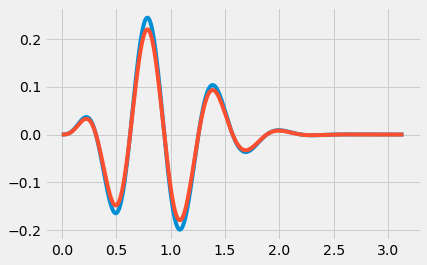

In [20]:
with plt.style.context('fivethirtyeight'):
  plt.plot(x,y, x,0.9*y)

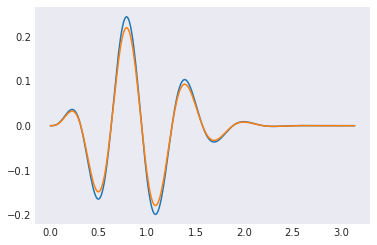

In [21]:
with plt.style.context('seaborn-dark'):
  plt.plot(x,y, x,0.9*y)

Los estilos disponibles están guardados en la variable `available` (una lista)

In [23]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'darker',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'latex',
 'paper',
 'presentation',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

#### Combinando estilos

Los estilos pueden combinarse. En este caso, debe pasarse una lista de *strings* con los nombres de los estilos a aplicar. Se aplican en forma secuencial. Si dos estilos definen diferentes valores para una variable, el posterior sobreescribe los valores previos. 

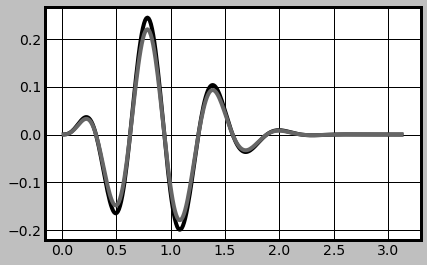

In [24]:
with plt.style.context(['fivethirtyeight','grayscale']):
  plt.plot(x,y, x,0.9*y)

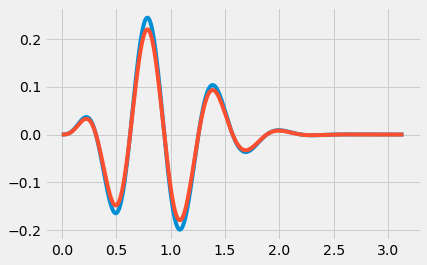

In [25]:
with plt.style.context(['grayscale','fivethirtyeight']):
  plt.plot(x,y, x,0.9*y)

#### Creación de estilos propios

Podemos crear estilos propios, modificando los defaults con una sintaxis similar a la del archivo de configuración. Por ejemplo creemos un archivo 'estilo_test' con algunos parámetros

In [26]:
!echo "lines.linewidth : 5" > estilo_test
!echo "xtick.labelsize: 24" >> estilo_test

In [27]:
!cat estilo_test

lines.linewidth : 5
xtick.labelsize: 24


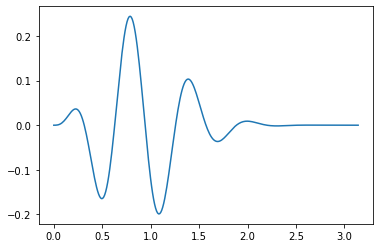

In [28]:
plt.plot(x,y)

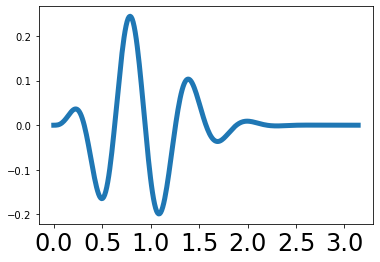

In [29]:
with plt.style.context('./estilo_test'):
  plt.plot(x,y)

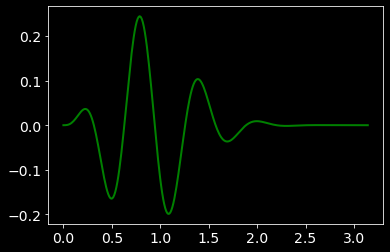

In [30]:
with plt.style.context('darker'):
  plt.plot(x,y,'g')

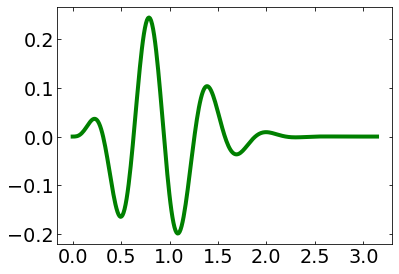

In [35]:
with plt.style.context('presentation'):
  plt.plot(x,y,'g')

Para encontrar el lugar donde guardar las hojas de estilo podemos utilizar las funciones de *matplotib*:

In [31]:
matplotlib.get_configdir()

'/home/fiol/.config/matplotlib'

In [32]:
ls -1 /home/fiol/.config/matplotlib/stylelib/

darker.mplstyle
latex.mplstyle
paper.mplstyle
presentation.mplstyle


In [33]:
!cat /home/fiol/.config/matplotlib/stylelib/darker.mplstyle

# -*- mode: conf -*-
font.size   : 14
lines.color : white
lines.linewidth   : 2     # line width in points
lines.markersize  : 8
patch.edgecolor : white

text.color : white

axes.facecolor : black
axes.edgecolor : white
axes.labelcolor : white
# Seaborn dark palette
axes.prop_cycle: cycler('color', ['001C7F', '017517', '8C0900', '7600A1', 'B8860B', '006374'])

xtick.color : white
ytick.color : white

grid.color : white

figure.facecolor : black
figure.edgecolor : black

savefig.facecolor : black
savefig.edgecolor : black



### Modificación de parámetros dentro de programas

Podemos cambiar directamente los parámetros dentro de nuestros programas modificando el diccionario `matplotlib.rcParams`

In [36]:
import matplotlib as mpl
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

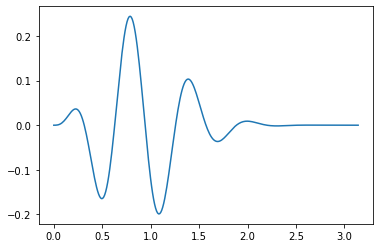

In [37]:
# Plot con valores default
plt.plot(x,y)

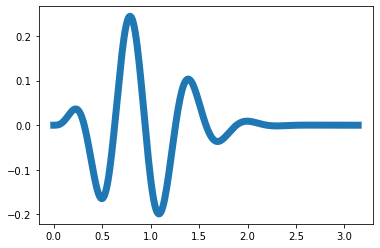

In [38]:
# Modificamos el valor default de ancho de línea 
mpl.rcParams['lines.linewidth'] = 7
plt.plot(x,y)

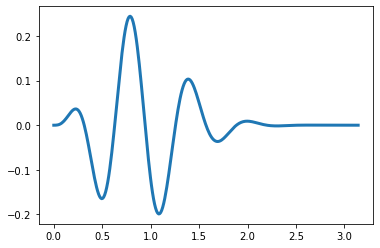

In [39]:
# El nuevo valor default podemos sobreescribirlo para este plot particular 
plt.plot(x,y, lw=3)

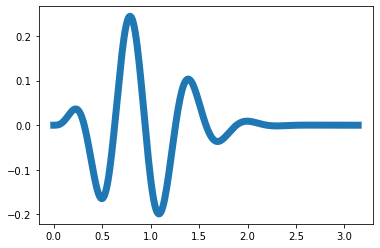

In [40]:
# Sin embargo, el nuevo valor default no es modificado
plt.plot(x,y)

-----

## Ejercicios 09 (c)

4. Notando que la curva en color negro corresponde a la suma de las dos curvas en rojo, rehacer la siguiente figura:

   ![](figuras/ejercicio_08_3.png)

5. Crear una hoja de estilo que permita hacer gráficos adecuados para posters y presentaciones. Debe modificar los tamaños para hacerlos legibles a mayores distancias (sugerencia 16pt). El tamaño de la letra de los nombres de ejes y en las leyendas debe ser mayor también. Las líneas deben ser más gruesas (sugerencia: ~4), los símbolos de mayor tamaño (sugerencia ~10). 

-----